In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")

In [4]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,AMC,BA,BTC-USD,EURUSD=X,GC=F,MSFT,USDEUR=X
Date,,,,,,,
2014-10-01,229.100006,124.669998,383.614990,1.262834,1214.599976,45.900002,0.791870
2014-10-02,232.000000,124.169998,375.071991,1.262419,1214.199951,45.759998,0.792130
2014-10-03,234.100006,126.360001,359.511993,1.267058,1192.199951,46.090000,0.789230
2014-10-04,NaN,NaN,328.865997,NaN,NaN,NaN,NaN
2014-10-05,NaN,NaN,320.510010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-03-08,4.300000,198.490005,68300.093750,1.095014,2178.600098,406.220001,0.913230
2024-03-09,NaN,NaN,68498.882812,NaN,NaN,NaN,NaN
2024-03-10,NaN,NaN,69019.789062,NaN,NaN,NaN,NaN


In [5]:
close["USDEUR=X"] = 1/close["EURUSD=X"]
close

,AMC,BA,BTC-USD,EURUSD=X,GC=F,MSFT,USDEUR=X
Date,,,,,,,
2014-10-01,229.100006,124.669998,383.614990,1.262834,1214.599976,45.900002,0.791870
2014-10-02,232.000000,124.169998,375.071991,1.262419,1214.199951,45.759998,0.792130
2014-10-03,234.100006,126.360001,359.511993,1.267058,1192.199951,46.090000,0.789230
2014-10-04,NaN,NaN,328.865997,NaN,NaN,NaN,NaN
2014-10-05,NaN,NaN,320.510010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-03-08,4.300000,198.490005,68300.093750,1.095014,2178.600098,406.220001,0.913230
2024-03-09,NaN,NaN,68498.882812,NaN,NaN,NaN,NaN
2024-03-10,NaN,NaN,69019.789062,NaN,NaN,NaN,NaN


In [6]:
fx = close[["EURUSD=X", "USDEUR=X"]].dropna().copy()
fx

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,1.262834,0.791870
2014-10-02,1.262419,0.792130
2014-10-03,1.267058,0.789230
2014-10-06,1.251361,0.799130
2014-10-07,1.264606,0.790760
...,...,...
2024-03-06,1.085600,0.921150
2024-03-07,1.089954,0.917470
2024-03-08,1.095014,0.913230


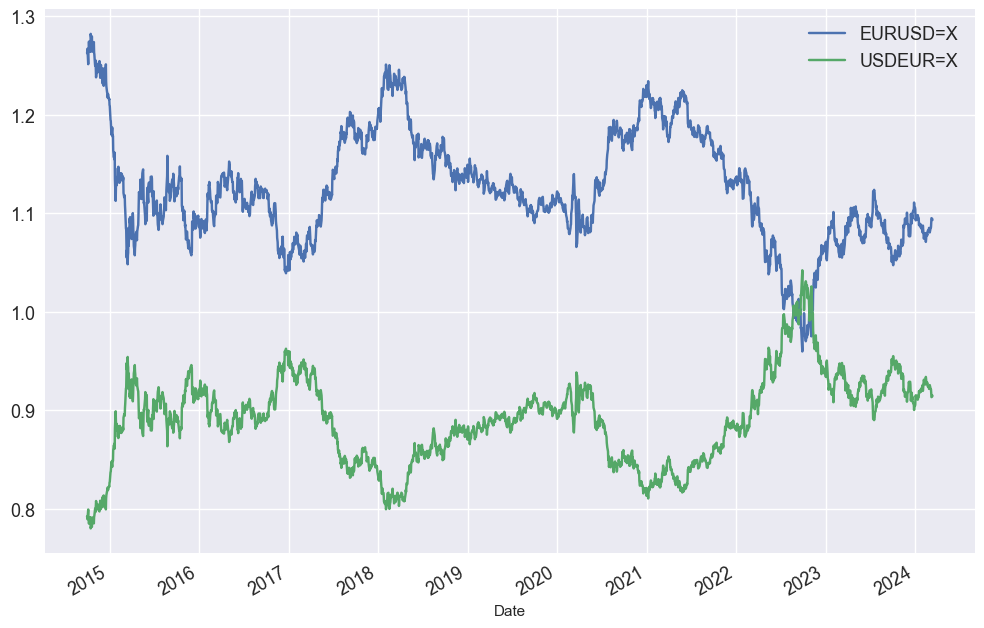

In [7]:
fx.plot(figsize = (12,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [9]:
simple_ret = fx.pct_change()
simple_ret
#유로입장에서 왼쪽이 매수수익률 오른쪽이 공매 수익률

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,NaN,NaN
2014-10-02,-0.000328,0.000328
2014-10-03,0.003674,-0.003661
2014-10-06,-0.012389,0.012544
2014-10-07,0.010585,-0.010474
...,...,...
2024-03-06,0.000076,-0.000076
2024-03-07,0.004011,-0.003995
2024-03-08,0.004643,-0.004621


In [10]:
#단순 수익률의 복리
simple_ret.add(1).prod() - 1

EURUSD=X   -0.134379
USDEUR=X    0.155240
dtype: float64

In [11]:
log_ret = np.log(fx / fx.shift())
log_ret

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,NaN,NaN
2014-10-02,-0.000328,0.000328
2014-10-03,0.003668,-0.003668
2014-10-06,-0.012466,0.012466
2014-10-07,0.010529,-0.010529
...,...,...
2024-03-06,0.000076,-0.000076
2024-03-07,0.004003,-0.004003
2024-03-08,0.004632,-0.004632


In [12]:
log_ret.sum()

EURUSD=X   -0.144308
USDEUR=X    0.144308
dtype: float64

In [13]:
norm_fx = log_ret.cumsum().apply(np.exp)
norm_fx

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,NaN,NaN
2014-10-02,0.999672,1.000328
2014-10-03,1.003345,0.996666
2014-10-06,0.990915,1.009168
2014-10-07,1.001404,0.998598
...,...,...
2024-03-06,0.859654,1.163259
2024-03-07,0.863102,1.158612
2024-03-08,0.867109,1.153257


In [14]:
norm_fx.iloc[0] = [1, 1]

In [16]:
norm_fx

,EURUSD=X,USDEUR=X
Date,,
2014-10-01,1.000000,1.000000
2014-10-02,0.999672,1.000328
2014-10-03,1.003345,0.996666
2014-10-06,0.990915,1.009168
2014-10-07,1.001404,0.998598
...,...,...
2024-03-06,0.859654,1.163259
2024-03-07,0.863102,1.158612
2024-03-08,0.867109,1.153257


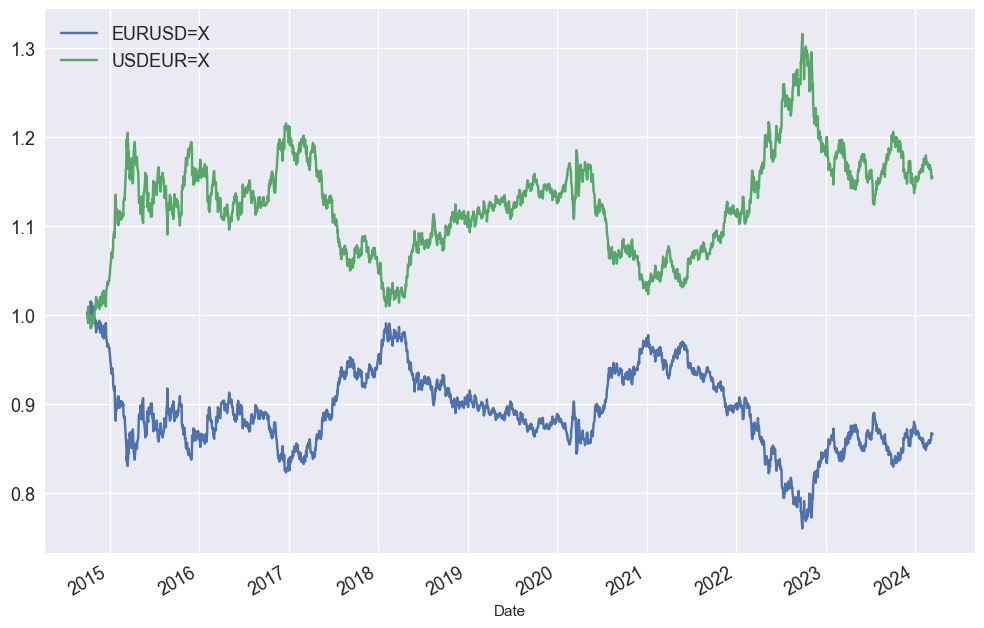

In [19]:
norm_fx.plot(figsize = (12, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## **공분산과 상관계수**

**1.공분산**
- 공분산은 두 변수 간의 관계의 방향을 나타내는 통계적 측도
- 공분산은 두 변수가 함께 어떻게 변하는지를 나타낸다. 즉, 하나의 변수가 증가할 때 다른 변수도 같이 증가하는지 감소하는지를 보여준다.
- 공분산의 값이 양수인 경우, 두 변수는 함께 증가하거나 함께 감소한다. 값이 음수인 경우, 하나의 변수가 증가할 때 다른 변수는 감소한다.
- 하지만 공분산의 단위는 각 변수의 단위의 곱이므로, 단독으로 공분산의 크기만으로는 변수 간의 관계의 강도를 파악하기 어렵다.

**2.상관계수**
- 상관계수는 두 변수 간의 선형적인 관계의 강도와 방향을 나타내는 통계적 측도이다.
- 상관계수는 -1과 1 사이의 값으로 표시된다. 1에 가까울수록 양의 선형 관계가 강하며, -1에 가까울수록 음의 선형 관계가 강하다.
- 상관계수가 0에 가까울수록 두 변수 간에 선형적인 관계가 거의 없음을 나타낸다.
- 상관계수는 공분산을 각 변수의 표준편차로 나누어 구할 수 있으므로, 단위에 영향을 받지 않는다.니다.

In [21]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [22]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,AMC,BA,BTC-USD,EURUSD=X,GC=F,MSFT,USDEUR=X
Date,,,,,,,
2014-10-01,229.1000,124.6700,383.6150,1.2628,1214.6000,45.9000,0.7919
2014-10-02,232.0000,124.1700,375.0720,1.2624,1214.2000,45.7600,0.7921
2014-10-03,234.1000,126.3600,359.5120,1.2671,1192.2000,46.0900,0.7892
2014-10-04,NaN,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-03-08,4.3000,198.4900,68300.0938,1.0950,2178.6001,406.2200,0.9132
2024-03-09,NaN,NaN,68498.8828,NaN,NaN,NaN,NaN
2024-03-10,NaN,NaN,69019.7891,NaN,NaN,NaN,NaN


In [23]:
close["USDEUR=X"] = 1/close["EURUSD=X"]
close

,AMC,BA,BTC-USD,EURUSD=X,GC=F,MSFT,USDEUR=X
Date,,,,,,,
2014-10-01,229.1000,124.6700,383.6150,1.2628,1214.6000,45.9000,0.7919
2014-10-02,232.0000,124.1700,375.0720,1.2624,1214.2000,45.7600,0.7921
2014-10-03,234.1000,126.3600,359.5120,1.2671,1192.2000,46.0900,0.7892
2014-10-04,NaN,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-03-08,4.3000,198.4900,68300.0938,1.0950,2178.6001,406.2200,0.9132
2024-03-09,NaN,NaN,68498.8828,NaN,NaN,NaN,NaN
2024-03-10,NaN,NaN,69019.7891,NaN,NaN,NaN,NaN


In [27]:
#로그수익률 가져오기
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,AMC,BA,BTC-USD,EURUSD=X,GC=F,MSFT,USDEUR=X
Date,,,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-02,0.0126,-0.0040,-0.0225,-0.0003,-0.0003,-0.0031,0.0003
2014-10-03,0.0090,0.0175,-0.0424,0.0037,-0.0183,0.0072,-0.0037
2014-10-04,NaN,NaN,-0.0891,NaN,NaN,NaN,NaN
2014-10-05,NaN,NaN,-0.0257,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-03-08,-0.0674,-0.0226,0.0203,0.0046,0.0095,-0.0072,-0.0046
2024-03-09,NaN,NaN,0.0029,NaN,NaN,NaN,NaN
2024-03-10,NaN,NaN,0.0076,NaN,NaN,NaN,NaN


In [28]:
returns.cov()#공분산

,AMC,BA,BTC-USD,EURUSD=X,GC=F,MSFT,USDEUR=X
AMC,0.0046,0.0004,0.0001,0.0000,-0.0000,0.0002,-0.0000
BA,0.0004,0.0007,0.0002,0.0000,0.0000,0.0002,-0.0000
BTC-USD,0.0001,0.0002,0.0014,-0.0000,0.0000,0.0001,0.0000
EURUSD=X,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000
GC=F,-0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,-0.0000
MSFT,0.0002,0.0002,0.0001,-0.0000,0.0000,0.0003,0.0000
USDEUR=X,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000


In [37]:
returns.corr()#상관계수

,AMC,BA,BTC-USD,EURUSD=X,GC=F,MSFT,USDEUR=X
AMC,1.0000,0.2434,0.0463,0.0308,-0.0359,0.1619,-0.0308
BA,0.2434,1.0000,0.1541,0.0223,0.0302,0.3928,-0.0223
BTC-USD,0.0463,0.1541,1.0000,-0.0068,0.0890,0.1982,0.0068
EURUSD=X,0.0308,0.0223,-0.0068,1.0000,0.0672,-0.0116,-1.0000
GC=F,-0.0359,0.0302,0.0890,0.0672,1.0000,0.0080,-0.0672
MSFT,0.1619,0.3928,0.1982,-0.0116,0.0080,1.0000,0.0116
USDEUR=X,-0.0308,-0.0223,0.0068,-1.0000,-0.0672,0.0116,1.0000


In [38]:
import seaborn as sns

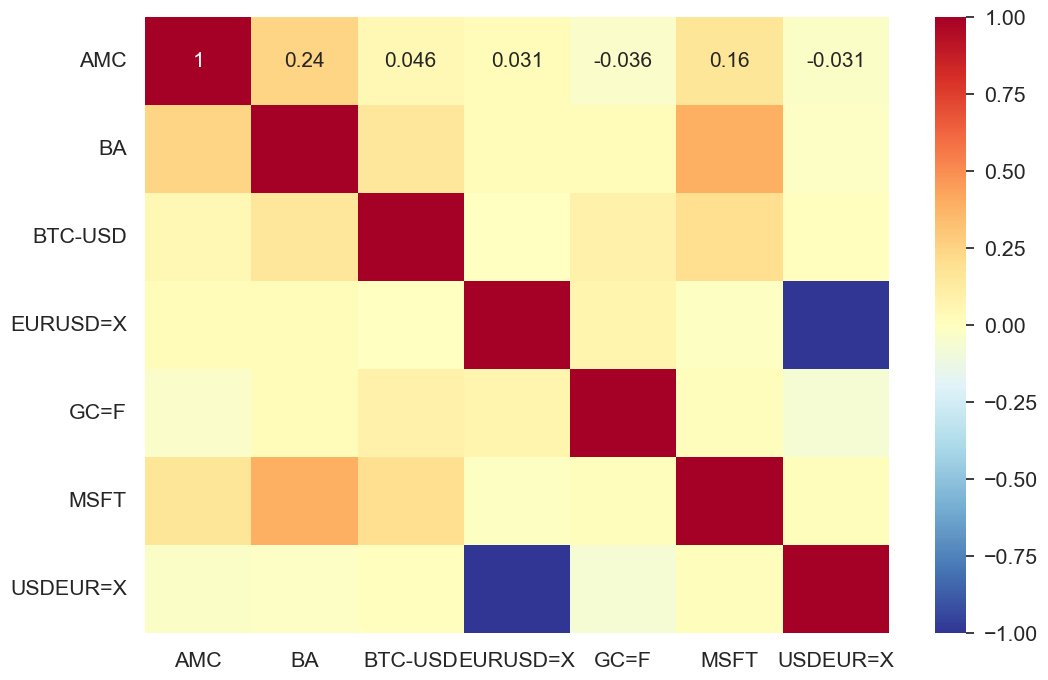

In [39]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(returns.corr(), cmap = "RdYlBu_r", annot = True, annot_kws={"size":15}, vmin = -1, vmax = 1)
plt.show()

In [ ]:
#기억해야할 것은 비슷한 수준의 자산들끼리는 높은 정비례 관계가 형성되며, 다른 수준의 자산들끼리는 낮거나 반비례 관계가 존재한다.
#그래서 포트폴리오 매니지먼트에서는 낮거나 반비례가 있는 자산을 가지는 것이 이득이다. -> 포트 폴리오 분산효과.